<a href="https://colab.research.google.com/github/lwerth/2019-October-Resources/blob/master/Statistical_Analysis_Positions_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title
## Load in clean spreadsheet
# This is loading in the "cleaned" spreadsheet created in 
# 'Dataset_Cleaning_MEZCOPH.ipynb'. I am also loading in
# an Excel spreadsheet named 'Question Key.xlsx'. You
# can use this spreadsheet to get the question associated with 
# each question ID

# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import researchpy as rp
from tabulate import tabulate
import scikit_posthocs as sp
from scipy.stats import chi2_contingency
from scipy.stats import norm
from itertools import combinations
from statsmodels.sandbox.stats.multicomp import multipletests
from simple_colors import *
import warnings


## Load Data
filename = "Clean Dataset.xlsx"
clean_df = pd.read_excel(filename, header = 0)
# clean_df2 = clean_df.where(pd.notnull(clean_df), "nan") #account for the zeros and NAs so we can easily exclude them down the line

# Load Question Key in dictionary form
filename = "Question Key.xlsx"
question_key_df = pd.read_excel(filename, header = 0)
question_key = {question_key_df['Question_ID'][i]: question_key_df['Question_FullText'][i] for i in range(len(question_key_df))}


In [ ]:
#@title
# list(clean_df.columns) 

In [ ]:
#@title
## These are the Question IDs of the survey questions that should be
# able to be analyzed with a Chi squared test. Note that there may
# be other questions in the survey that can be analyzed with a Chi-Squared Test
# or with other tests.

# Define Columns of Survey Questions that can be analyzed with Chi Squared Test
survey_cols = ['Q5', 'Q6', 'Q7', 'Q13_1', 'Q13_2', 'Q13_3', 'Q13_4', 'Q13_5', 'Q13_6', 'Q13_7', 'Q13_8', 'Q14', 'Q22',
               'Q27_1', 'Q27_2', 'Q27_3', 'Q27_4', 'Q27_5', 'Q27_6', 'Q27_7', 'Q27_8', 'Q27_9', 'Q27_10',
               'Q27_11', 'Q27_12', 'Q27_13', 'Q27_14', 'Q27_15', 'Q27_16', 'Q27_17', 'Q27_18', 'Q27_19',
               'Q29_1', 'Q29_2', 'Q29_3', 'Q29_4', 'Q29_5', 'Q29_6', 'Q29_7', 'Q29_8', 'Q29_9', 'Q29_10', 
               'Q29_11', 'Q29_12', 'Q29_13', 'Q29_14', 'Q29_15', 'Q29_16', 'Q29_17', 'Q29_18',
               'Q31_1', 'Q31_2', 'Q31_3', 'Q31_4', 'Q31_5', 'Q31_6', 'Q31_7', 'Q31_8', 'Q31_9',
               'Q33_1', 'Q33_2', 'Q33_3', 'Q33_4', 'Q33_5', 'Q33_6', 'Q33_7', 'Q33_8', 'Q33_9',
               'Q33_10', 'Q33_11', 'Q33_12', 'Q33_13', 'Q33_14', 'Q33_15', 'Q33_16',
               'Q35_1', 'Q35_2', 'Q35_3', 'Q35_4', 'Q35_5', 'Q35_6', 'Q35_7', 'Q35_8', 'Q35_9', 'Q35_10', 
               'Q35_11', 'Q35_12', 'Q35_13', 'Q35_14', 'Q35_15', 'Q35_16', 'Q35_17', 'Q35_18', 'Q35_19', 'Q35_20', 
               'Q37_1', 'Q37_2', 'Q37_3', 'Q37_4', 'Q37_5', 'Q37_6', 'Q37_7', 'Q37_8', 'Q37_9', 'Q37_10', 'Q37_11',
               'Q39', 'Q44', 'Q56', 'Q45', 'Q57', 'Q46', 'Q58', 'Q47', 'Q99', 'Q103', 'Q106', 
               'Q111_1', 'Q111_2', 'Q111_3', 'Q111_4', 'Q111_5', 'Q111_6', 'Q111_7', 'Q111_8', 'Q111_9', 'Q111_10', 'Q111_11', 'Q111_12',
               'Q112_1', 'Q112_2', 'Q112_3', 'Q112_4', 'Q112_5', 'Q112_6', 'Q112_7', 'Q112_8', 'Q112_9', 'Q112_10', 'Q112_11', 'Q112_12',
               'Q113_1', 'Q113_2', 'Q113_3', 'Q113_4', 'Q113_5', 'Q113_6', 'Q113_7', 'Q113_8', 'Q113_9', 'Q113_10', 'Q113_11', 'Q113_12', 'Q113_13',
               'Q116_1', 'Q116_2', 'Q116_3', 'Q116_4', 'Q116_5', 'Q116_6', 'Q116_7', 'Q116_8', 'Q116_9',
               'Q118#1_1', 'Q118#1_2', 'Q118#1_3', 'Q118#1_4', 'Q118#1_5', 'Q118#1_6', 'Q118#1_7', 'Q118#1_8', 'Q118#1_9', 
               'Q118#1_10', 'Q118#1_11', 'Q118#1_12', 'Q118#1_13', 'Q118#1_14', 'Q118#1_15', 'Q118#1_16', 'Q118#1_17', 'Q118#1_18',
               'Q118#2_1', 'Q118#2_2', 'Q118#2_3', 'Q118#2_4', 'Q118#2_5', 'Q118#2_6', 'Q118#2_7', 'Q118#2_8', 'Q118#2_9',
               'Q118#2_10', 'Q118#2_11', 'Q118#2_12', 'Q118#2_13', 'Q118#2_14', 'Q118#2_15', 'Q118#2_16', 'Q118#2_17', 'Q118#2_18',    
               'Q120#1_1', 'Q120#1_2', 'Q120#1_3', 'Q120#1_4', 'Q120#1_5', 'Q120#1_6', 
               'Q120#1_7', 'Q120#1_8', 'Q120#1_9', 'Q120#1_10', 'Q120#1_11',
               'Q120#2_1', 'Q120#2_2', 'Q120#2_3', 'Q120#2_4', 'Q120#2_5', 'Q120#2_6',
               'Q120#2_7', 'Q120#2_8', 'Q120#2_9', 'Q120#2_10', 'Q120#2_11', 
               'Q122#1_1', 'Q122#1_2', 'Q122#1_3', 'Q122#1_4', 'Q122#1_5', 'Q122#1_6',
               'Q122#1_7', 'Q122#1_8', 'Q122#1_9', 'Q122#1_10', 'Q122#1_11',
               'Q122#2_1', 'Q122#2_2', 'Q122#2_3', 'Q122#2_4', 'Q122#2_5', 'Q122#2_6', 
               'Q122#2_7', 'Q122#2_8', 'Q122#2_9', 'Q122#2_10','Q122#2_11',
               'Q170_1', 'Q170_2', 'Q170_3', 'Q170_4', 'Q170_5', 'Q170_6', 'Q170_7', 'Q170_8',
               'Q170_9', 'Q170_10', 'Q170_11', 'Q170_12', 'Q170_3', 'Q170_14', 'Q170_15', 'Q170_16']

In [ ]:
#@title
# OG
# ## Define Function to Identify potential questions of interest with a Chi Squared Test

# # Define Function
# def Potential_Questions_of_Interest(df, demographic_col):

#     # Identify columns that shows significance with Chi-Squared
#     sig_cols = []
#     for col in survey_cols:
#         df_sub = df.loc[(~pd.isnull(df[demographic_col])) & (~pd.isnull(df[col])), [demographic_col, col]].copy()
#         contingency_tbl_df = pd.crosstab(df_sub[demographic_col], df_sub[col], margins = False)
#         contingency_tbl_np = contingency_tbl_df.to_numpy()
#         if len(contingency_tbl_df)>0:
#             stat, p, dof, expected = chi2_contingency(contingency_tbl_np)
#             if p < 0.05: # Print out questions that show significant differences between groups
#                 print("Chi Square:", np.round(stat, decimals=2), " P-value:", np.round(p, decimals=4))
#                 sig_cols.append(col)

#     # Print out percentages for each question
#     groups = df[demographic_col].unique()
#     groups = groups[~pd.isnull(groups)] 
#     for col in sig_cols:
#         print('*****')
#         print(col + ': ' + question_key[col])

#         # Define Answer Options for Question
#         if 'Agree' in df[col].unique():
#             answer_options = ['Strongly disagree', 'Disagree', 'Neither agree nor disagree',
#                               'Agree', 'Strongly agree']
#         else:
#             answer_options = df[col].unique()
#             answer_options = answer_options[~pd.isnull(answer_options)]

            
#         # Initialize an Empty DF
#         df_results = pd.DataFrame(' ', index=groups, columns=answer_options)
#         for group in groups:
#             df_group = df.loc[(df[demographic_col]==group) & (~pd.isnull(df[col]))].copy()
#             for answer in answer_options:
#                 N = len(df_group.loc[df_group[col]==answer])
#                 Pct = np.round(N/len(df_group)*100) if len(df_group)*100 != 0 else 0 #some calulations were infinite and caused erros, if/else accounted for that
#                 cell_val = str(Pct) + '%' + ' (N=' + str(N) + ')'
#                 df_results.loc[group][answer] = cell_val


#         # Print df
#         display(df_results.head())

In [ ]:
#@title
## Define Function to Identify potential questions of interest with a Chi Squared Test

# Define Function
def Potential_Questions_of_Interest(df, demographic_col):
 
    
    # Find and print out questions that show significant differences between groups
    sig_cols = []
    for col in survey_cols:
        df_sub = df.loc[(~pd.isnull(df[demographic_col])) & (~pd.isnull(df[col])), [demographic_col, col]].copy()
        contingency_tbl_df = pd.crosstab(df_sub[demographic_col], df_sub[col], margins = False)
        contingency_tbl_np = contingency_tbl_df.to_numpy()
        if len(contingency_tbl_df)>0:
            stat, p, dof, exp = chi2_contingency(contingency_tbl_np)
            crosstab, test_res, expected = rp.crosstab(df_sub[demographic_col], df_sub[col],
                                                       test = "chi-square",expected_freqs= True, prop = "cell") # apply the chi-square test again to get a table layout of multiple test results - chi^2, pval, cramer's
            if p < 0.05: # Identify columns that show significance 
                
                # setup for assumption check
                
                expected_tbl_df = pd.DataFrame(expected) #put expected tabel into dataframe
                exp_coltotals = expected_tbl_df.sum() #column totals
#                 print(exp_coltotals)
                n_expcols = len(exp_coltotals) #column length
                exp_rowtotals = expected_tbl_df.sum(axis=1) #row totals
#                 print(exp_rowtotals)
                n_exprows = len(exp_rowtotals) #row length
                n_exp_cells = (n_expcols* n_exprows)  #total number of cells          
#                 print(n_exp_cells)
                cell_check = (n_exp_cells * .02) # create 20% of cells amount
                expected_tbl_np = expected_tbl_df.to_numpy().astype(int) #transform dataframe to integer array
#                 print(expected_tbl_np)

                # here we check the expected table for zeros
                # "No cell should have an expected count of 0."
                zeros = []
                for x in np.nditer(expected_tbl_np):
                    if x == 0:
                        zeros.append(1)
                zero_assumpt = np.where(sum(zeros) >0, "FAILS", "PASSES")
#                 print(zero_assumpt)
                
                # here we check the expected table for cell values < 5
                # "No more than 20% of cells should have an expected count less than 5"
                low_count = []
                for x in np.nditer(expected_tbl_np):
                    if x < 5:
                        low_count.append(1)
                    else:
                        low_count.append(0)
                
                # caculate cell_percentage and make assumption
                
                cell_percentage = (sum(low_count) / n_exp_cells) #[x /n_exp_cells for x in low_count] # (low_count / n_exp_cells)
                percentage_assumpt = np.where(cell_percentage <= .2, "PASSED Assumption Check 1", "FAILED Assumption Check 1")
#                 print(percentage_assumpt)
                
                # IF THE TEST PASSES BOTH ASSUMPTION CHECKS, THEN PRINT OUT, IF NOT, SKIP
                if percentage_assumpt == "PASSED Assumption Check 1" and zero_assumpt == "PASSES":
                    # setup for post hoc test
                    # row, column and all totals
                    contingency_tbl_df = contingency_tbl_df.astype(int)
                    coltotals = contingency_tbl_df.sum()
                    ncols = len(coltotals)
                    rowtotals = contingency_tbl_df.sum(axis=1)
                    nrows = len(rowtotals)
                    n=sum(coltotals)
#                 print(n)
                
                # apply adjusted residual formula
                # formula = (og_values - expected_values) / sqrt(expected_values times mean of rows time mean of columns)
                    ph_res = pd.DataFrame(columns=["Group", "Selection", "Original P-Value",'Normalized Z-score','Post-Hoc', "Significant Differences"]) #set up dataframe # removed from output:  "Adjusted Residuals", 
                    for i in range(nrows): # locate row
                        for j in range(ncols): #loacte column
                            adj_res = (contingency_tbl_df.iloc[i,j] - exp[i,j]) / (exp[i,j]*(1-rowtotals[i]/n)*(1-coltotals[j]/n))**.5
                            new_sig = (2*(1-norm.cdf(abs(adj_res)))) #create the normalized z-score
                            bonferroni = contingency_tbl_df.shape[0]*new_sig #apply the bonferroni
                            adj_bonferroni = np.where(bonferroni > 1,1,bonferroni) # Adjust high results
                            adj_bonferroni = np.round(adj_bonferroni, decimals=6)
                            significance = np.where(adj_bonferroni <= .05, "Significant", "Not Significant") #find significance
                            ph_res = ph_res.append({"Group":contingency_tbl_df.index[i], "Selection":contingency_tbl_df.columns[j], "Original P-Value":p,
                                                 'Normalized Z-score': new_sig,'Post-Hoc':adj_bonferroni, "Significant Differences":significance}, ignore_index=True) # Removed from output:"Adjusted Residuals":adj_res,
                    
            # set up for original counts and percentages   
            # display different types of selections in the dataframe
                    groups = df[demographic_col].unique()
                    groups = groups[~pd.isnull(groups)]
                    if 'Agree' in df[col].unique():
                        answer_options = ['Strongly disagree', 'Disagree', 'Neither agree nor disagree',
                                          'Agree', 'Strongly agree']
                    else:
                        answer_options = df[col].unique()
                        answer_options = answer_options[~pd.isnull(answer_options)]            
                
                # Initialize an Empty DF for easy display
                    df_results = pd.DataFrame(' ', index=groups, columns=answer_options)
                    for group in groups:
                        df_group = df.loc[(df[demographic_col]==group) & (~pd.isnull(df[col]))].copy()
                    #get table of percentages and counts
                        for answer in answer_options:
                            N = len(df_group.loc[df_group[col]==answer])
                            Pct = np.round(N/len(df_group)*100) if len(df_group)*100 != 0 else 0 #some calulations were infinite and caused erros, if/else accounted for that
                            cell_val = str(Pct) + '%' + ' (N=' + str(N) + ')'
                            df_results.loc[group][answer] = cell_val

                
                #print out results
                    print("\033[1m" +col+"\033[0m", ":",question_key[col],"\n")
                    print("\033[1m" +"CHI-SQUARE SIGNIFICANCE OVERVIEW: " + str(col)+"\033[0m",)
                    print("An omnibus chi-square test of independence shows that there is a significant association between", demographic_col+"," "and their responses to", col+". The chi-square significance test* shows: X\u00b2("+str(dof) +",","N=" + str(n) +") =",np.round(stat, decimals=2),"p="+ str(np.round(p, decimals=2))+".","\n","*We can read this as: X\u00b2(Degrees of Freedom, N=Sample Size) = Chi-square statistic, p-value.", "\n")
                    print("*"*25)
#                     print("\033[1m" +"ASSUMPTION CHECKS: "+"\033[0m")
#                     print("\n","1)", "For tables larger than 2x2, each cell should have an expected count of at least 5 for at least 80% of the cells.", "\n","2)", "No cell should have an expected count of 0.", "\n","-- So no more than 20% of cells should have an expected count less than 5, and none should be 0.","\n")
#                     #                     print("Review the Assumption Check to see if our post-hoc testing (Bonferroni) can be used for inter-group comparison.", "\n")
#                     print("If at least one of the Assumption checks fail we find no significance for our test and skip the question. If the question passes both Assumption Checks then we can review the post-hoc significance of group categories.","\n")
#                     print("\033[1m" +"Below are the results that pass BOTH Assumption checks"+"\033[0m","for the Chi-Square test, and we can review their post-hoc (Bonferroni) significance.","\n")
#                     print("*"*25)
#                     print("\033[1m" +"ASSUMPTION CHECK: "+"\033[0m",)
#                     print("\n","1)", "For tables larger than 2x2, each cell should have an expected count of at least 5 for at least 80% of the cells.", "\n",
#                           "2)", "No cell should have an expected count of 0.", "\n","-- So no more than 20% of cells should have an expected count less than 5, and none should be 0.","\n")
#                     print( "\033[1m" +"Expected Cell Count Table: "+"\033[0m")
#                     display(pd.DataFrame(expected)) #ex2))
#                     display(pd.DataFrame(test_res)
#                     print("\n","\033[1m" +"ASSUMPTION REVIEW: "+"\033[0m","\n")
#                     print("1) This survey question","\033[1m", percentage_assumpt,"\033[0m", "for a less than 5 cell count in", f"{cell_percentage:.0%}", "of the expected cells.")
#                     print("2) There were", sum(zeros), "zeros in the expected cell count, so the survey question","\033[1m",zero_assumpt, "Assumption Check 2.","\033[0m")
#                     print("If at least one of the Assumption checks fail, we find no significance for our assumptions and skip the question.")
#                     print("If the question passes both Assumption Checks then we can review the post-hoc significance of group categories.")
#                     print("\n")                
                    print("\033[1m" +"GROUP CATEGORY SIGNIFICANCE for " + str(col) +"\033[0m")
                    print("This table shows the groups with/without statisticaly significant differences. The Post-Hoc test is a Bonferroni test with p-value significance at .05.","\n")
                    display(ph_res)
                    print("\n","*"*25,"\n","\n","\033[1m" +"Original Counts and Percentages for:" + str(col)+"\033[0m")
                    display(df_results.head())
                    print("\n","\n","-"*120,"\n","\n" )            
                    sig_cols.append(col)



In [ ]:
#@title
# import sys

# orig_stdout = sys.stdout
# f = open(positions_with_MEZCOPH, "w")
# sys.stdout = f

# positions_with_MEZCOPH = "Positions_with_MEZCOPH.docx"
# write_positions = open(positions_with_MEZCOPH, "w")
# write_positions.write(Potential_Questions_of_Interest(clean_df_subset_students, 'Graduate and Undergraduate Students'))
# write_positions.close()

# write_positions = Potential_Questions_of_Interest(clean_df_subset_students, 'Graduate and Undergraduate Students')
# with open('Positions_with_MEZCOPH.docx', 'w') as f:
#     print>>f,'positions_with_MEZCOPH:', write_positions

Undergraduate Student (including online, in person; phoenix campus) or Recent Graduate    155
Graduate Student (including online, in person; phoenix campus) or Recent Graduate         142
Staff (including postdocs, visiting scholars, Administrator without Faculty title)         84
Tenured/Tenure-Track Faculty                                                               40
Career-Track Faculty (including Lecturers)                                                 30
Name: Position within MEZCOPH, dtype: int64


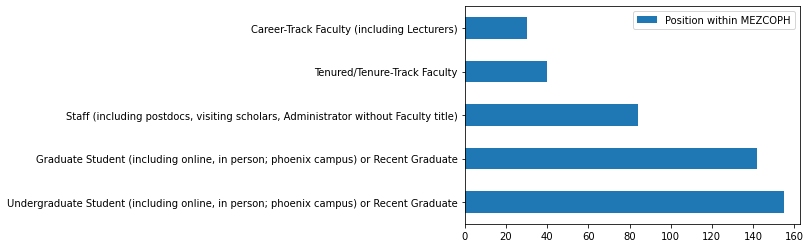

In [ ]:
#@title
#find count of unique values
print(clean_df['Position within MEZCOPH'].value_counts())
clean_df['Position within MEZCOPH'].value_counts().plot(kind='barh')
plt.legend()

# print(clean_df['Position within MEZCOPH'].nunique())


In [ ]:
#@title
warnings.filterwarnings('ignore')

clean_df['Pos within MEZCOPH'] = clean_df['Position within MEZCOPH'].replace({'Undergraduate Student (including online, in person; phoenix campus) or Recent Graduate':'Undergraduate Student',
                                            "Graduate Student (including online, in person; phoenix campus) or Recent Graduate":'Graduate Student',
                                            'Tenured/Tenure-Track Faculty':'Tenure Faculty',
                                            'Career-Track Faculty (including Lecturers)':'Career Track Faculty',
                                            'Staff (including postdocs, visiting scholars, Administrator without Faculty title)':'staff'})
# clean_df['Position_fac_staf_stud']
# create new column with dropped categories we don't need
Pos_na = clean_df['Pos within MEZCOPH'].isna()

clean_df_subset_pos = clean_df.loc[clean_df['Pos within MEZCOPH']!=Pos_na].copy() 

# # Call Function with df of interest and demographic group of interest
print("\033[1m" +"ASSUMPTION CHECKS: "+"\033[0m")
print("\n","1)", "For tables larger than 2x2, each cell should have an expected count of at least 5 for at least 80% of the cells.", "\n","2)", "No cell should have an expected count of 0.", "\n","-- So no more than 20% of cells should have an expected count less than 5, and none should be 0.","\n")
print("If at least one of the Assumption checks fail we find no significance for our test and skip the question. If the question passes both Assumption Checks then we can review the post-hoc significance of group categories.","\n")
print("\033[1m" +"Below are the results that pass BOTH Assumption checks"+"\033[0m","for the Chi-Square test, and we can review their post-hoc (Bonferroni) significance.","\n")
print("*"*120, "\n")
print("ALL POSITIONS", "\n")
print("_"*100, "\n")
Potential_Questions_of_Interest(clean_df_subset_pos, 'Pos within MEZCOPH')

ASSUMPTION CHECKS: 

 1) For tables larger than 2x2, each cell should have an expected count of at least 5 for at least 80% of the cells. 
 2) No cell should have an expected count of 0. 
 -- So no more than 20% of cells should have an expected count less than 5, and none should be 0. 

If at least one of the Assumption checks fail we find no significance for our test and skip the question. If the question passes both Assumption Checks then we can review the post-hoc significance of group categories. 

Below are the results that pass BOTH Assumption checks for the Chi-Square test, and we can review their post-hoc (Bonferroni) significance. 

************************************************************************************************************************ 

ALL POSITIONS 

____________________________________________________________________________________________________ 

Q7 : Have you ever seriously considered leaving MEZCOPH? 

CHI-SQUARE SIGNIFICANCE OVERVIEW: Q7
An omnibus c

,Group,Selection,Original P-Value,Normalized Z-score,Post-Hoc,Significant Differences
0,Career Track Faculty,No,5.110748e-18,6.863379e-07,0.000003,Significant
1,Career Track Faculty,Yes,5.110748e-18,6.863379e-07,0.000003,Significant
2,Graduate Student,No,5.110748e-18,2.833855e-03,0.014169,Significant
3,Graduate Student,Yes,5.110748e-18,2.833855e-03,0.014169,Significant
4,Tenure Faculty,No,5.110748e-18,2.358849e-08,0.000000,Significant
5,Tenure Faculty,Yes,5.110748e-18,2.358849e-08,0.000000,Significant
6,Undergraduate Student,No,5.110748e-18,1.887549e-08,0.000000,Significant
7,Undergraduate Student,Yes,5.110748e-18,1.887549e-08,0.000000,Significant
8,staff,No,5.110748e-18,9.639699e-04,0.004820,Significant
9,staff,Yes,5.110748e-18,9.639699e-04,0.004820,Significant



 ************************* 
 
 Original Counts and Percentages for:Q7


,No,Yes
Graduate Student,76.0% (N=107),24.0% (N=34)
staff,51.0% (N=42),49.0% (N=41)
Tenure Faculty,26.0% (N=10),74.0% (N=29)
Undergraduate Student,84.0% (N=127),16.0% (N=25)
Career Track Faculty,22.0% (N=6),78.0% (N=21)



 
 ------------------------------------------------------------------------------------------------------------------------ 
 

Q13_2 : Please indicate the extent to which you agree with each of the following statements regarding your academic experience at MEZCOPH. - I am satisfied with my academic experience at MEZCOPH. 

CHI-SQUARE SIGNIFICANCE OVERVIEW: Q13_2
An omnibus chi-square test of independence shows that there is a significant association between Pos within MEZCOPH,and their responses to Q13_2. The chi-square significance test* shows: X²(4, N=285) = 12.41 p=0.01. 
 *We can read this as: X²(Degrees of Freedom, N=Sample Size) = Chi-square statistic, p-value. 

*************************
GROUP CATEGORY SIGNIFICANCE for Q13_2
This table shows the groups with/without statisticaly significant differences. The Post-Hoc test is a Bonferroni test with p-value significance at .05. 



,Group,Selection,Original P-Value,Normalized Z-score,Post-Hoc,Significant Differences
0,Graduate Student,Agree,0.014528,0.501413,1.000000,Not Significant
1,Graduate Student,Disagree,0.014528,0.601266,1.000000,Not Significant
2,Graduate Student,Neither agree nor disagree,0.014528,0.044113,0.088227,Not Significant
3,Graduate Student,Strongly agree,0.014528,0.001207,0.002413,Significant
4,Graduate Student,Strongly disagree,0.014528,0.373486,0.746973,Not Significant
5,Undergraduate Student,Agree,0.014528,0.501413,1.000000,Not Significant
6,Undergraduate Student,Disagree,0.014528,0.601266,1.000000,Not Significant
7,Undergraduate Student,Neither agree nor disagree,0.014528,0.044113,0.088227,Not Significant
8,Undergraduate Student,Strongly agree,0.014528,0.001207,0.002413,Significant
9,Undergraduate Student,Strongly disagree,0.014528,0.373486,0.746973,Not Significant



 ************************* 
 
 Original Counts and Percentages for:Q13_2


,Strongly disagree,Disagree,Neither agree nor disagree,Agree,Strongly agree
Graduate Student,4.0% (N=5),10.0% (N=13),23.0% (N=31),47.0% (N=63),16.0% (N=22)
staff,0% (N=0),0% (N=0),0% (N=0),0% (N=0),0% (N=0)
Tenure Faculty,0% (N=0),0% (N=0),0% (N=0),0% (N=0),0% (N=0)
Undergraduate Student,2.0% (N=3),8.0% (N=12),14.0% (N=21),43.0% (N=65),33.0% (N=50)
Career Track Faculty,0% (N=0),0% (N=0),0% (N=0),0% (N=0),0% (N=0)



 
 ------------------------------------------------------------------------------------------------------------------------ 
 

Q14 : Within the past year, have you personally experienced any exclusionary (e.g., shunned, ignored), intimidated, offended, and/or hostile conduct (e.g., bullied, harassed) that has interfered with your ability to learn, live, or work at MEZCOPH? 

CHI-SQUARE SIGNIFICANCE OVERVIEW: Q14
An omnibus chi-square test of independence shows that there is a significant association between Pos within MEZCOPH,and their responses to Q14. The chi-square significance test* shows: X²(4, N=426) = 30.77 p=0.0. 
 *We can read this as: X²(Degrees of Freedom, N=Sample Size) = Chi-square statistic, p-value. 

*************************
GROUP CATEGORY SIGNIFICANCE for Q14
This table shows the groups with/without statisticaly significant differences. The Post-Hoc test is a Bonferroni test with p-value significance at .05. 



,Group,Selection,Original P-Value,Normalized Z-score,Post-Hoc,Significant Differences
0,Career Track Faculty,No,0.000003,0.002083,0.010414,Significant
1,Career Track Faculty,Yes,0.000003,0.002083,0.010414,Significant
2,Graduate Student,No,0.000003,0.566939,1.000000,Not Significant
3,Graduate Student,Yes,0.000003,0.566939,1.000000,Not Significant
4,Tenure Faculty,No,0.000003,0.001355,0.006776,Significant
5,Tenure Faculty,Yes,0.000003,0.001355,0.006776,Significant
6,Undergraduate Student,No,0.000003,0.000014,0.000072,Significant
7,Undergraduate Student,Yes,0.000003,0.000014,0.000072,Significant
8,staff,No,0.000003,0.674352,1.000000,Not Significant
9,staff,Yes,0.000003,0.674352,1.000000,Not Significant



 ************************* 
 
 Original Counts and Percentages for:Q14


,Yes,No
Graduate Student,19.0% (N=25),81.0% (N=107)
staff,19.0% (N=15),81.0% (N=64)
Tenure Faculty,36.0% (N=14),64.0% (N=25)
Undergraduate Student,7.0% (N=10),93.0% (N=141)
Career Track Faculty,40.0% (N=10),60.0% (N=15)



 
 ------------------------------------------------------------------------------------------------------------------------ 
 

Q111_7 : Please indicate the extent to which you agree with each of the following statements. - I think that faculty prejudge my abilities based on their perception of my identity/background 

CHI-SQUARE SIGNIFICANCE OVERVIEW: Q111_7
An omnibus chi-square test of independence shows that there is a significant association between Pos within MEZCOPH,and their responses to Q111_7. The chi-square significance test* shows: X²(5, N=266) = 16.24 p=0.01. 
 *We can read this as: X²(Degrees of Freedom, N=Sample Size) = Chi-square statistic, p-value. 

*************************
GROUP CATEGORY SIGNIFICANCE for Q111_7
This table shows the groups with/without statisticaly significant differences. The Post-Hoc test is a Bonferroni test with p-value significance at .05. 



,Group,Selection,Original P-Value,Normalized Z-score,Post-Hoc,Significant Differences
0,Graduate Student,Agree,0.006179,0.313650,0.627300,Not Significant
1,Graduate Student,Disagree,0.006179,0.880558,1.000000,Not Significant
2,Graduate Student,Neither agree nor disagree,0.006179,0.036338,0.072676,Not Significant
3,Graduate Student,Not Applicable,0.006179,0.640792,1.000000,Not Significant
4,Graduate Student,Strongly agree,0.006179,0.001516,0.003032,Significant
5,Graduate Student,Strongly disagree,0.006179,0.053149,0.106298,Not Significant
6,Undergraduate Student,Agree,0.006179,0.313650,0.627300,Not Significant
7,Undergraduate Student,Disagree,0.006179,0.880558,1.000000,Not Significant
8,Undergraduate Student,Neither agree nor disagree,0.006179,0.036338,0.072676,Not Significant
9,Undergraduate Student,Not Applicable,0.006179,0.640792,1.000000,Not Significant



 ************************* 
 
 Original Counts and Percentages for:Q111_7


,Strongly disagree,Disagree,Neither agree nor disagree,Agree,Strongly agree
Graduate Student,24.0% (N=28),22.0% (N=26),24.0% (N=29),19.0% (N=23),7.0% (N=8)
staff,0% (N=0),0% (N=0),0% (N=0),0% (N=0),0% (N=0)
Tenure Faculty,0% (N=0),0% (N=0),0% (N=0),0% (N=0),0% (N=0)
Undergraduate Student,14.0% (N=21),21.0% (N=31),14.0% (N=21),24.0% (N=36),20.0% (N=30)
Career Track Faculty,0% (N=0),0% (N=0),0% (N=0),0% (N=0),0% (N=0)



 
 ------------------------------------------------------------------------------------------------------------------------ 
 

Q111_8 : Please indicate the extent to which you agree with each of the following statements. - I believe that the campus climate encourages free and open discussion of difficult topics 

CHI-SQUARE SIGNIFICANCE OVERVIEW: Q111_8
An omnibus chi-square test of independence shows that there is a significant association between Pos within MEZCOPH,and their responses to Q111_8. The chi-square significance test* shows: X²(4, N=266) = 34.57 p=0.0. 
 *We can read this as: X²(Degrees of Freedom, N=Sample Size) = Chi-square statistic, p-value. 

*************************
GROUP CATEGORY SIGNIFICANCE for Q111_8
This table shows the groups with/without statisticaly significant differences. The Post-Hoc test is a Bonferroni test with p-value significance at .05. 



,Group,Selection,Original P-Value,Normalized Z-score,Post-Hoc,Significant Differences
0,Graduate Student,Agree,5.701567e-07,0.030381,0.060762,Not Significant
1,Graduate Student,Disagree,5.701567e-07,0.035207,0.070414,Not Significant
2,Graduate Student,Neither agree nor disagree,5.701567e-07,0.000490,0.000980,Significant
3,Graduate Student,Strongly agree,5.701567e-07,0.001808,0.003615,Significant
4,Graduate Student,Strongly disagree,5.701567e-07,0.000820,0.001640,Significant
5,Undergraduate Student,Agree,5.701567e-07,0.030381,0.060762,Not Significant
6,Undergraduate Student,Disagree,5.701567e-07,0.035207,0.070414,Not Significant
7,Undergraduate Student,Neither agree nor disagree,5.701567e-07,0.000490,0.000980,Significant
8,Undergraduate Student,Strongly agree,5.701567e-07,0.001808,0.003615,Significant
9,Undergraduate Student,Strongly disagree,5.701567e-07,0.000820,0.001640,Significant



 ************************* 
 
 Original Counts and Percentages for:Q111_8


,Strongly disagree,Disagree,Neither agree nor disagree,Agree,Strongly agree
Graduate Student,9.0% (N=11),12.0% (N=14),24.0% (N=28),34.0% (N=41),21.0% (N=25)
staff,0% (N=0),0% (N=0),0% (N=0),0% (N=0),0% (N=0)
Tenure Faculty,0% (N=0),0% (N=0),0% (N=0),0% (N=0),0% (N=0)
Undergraduate Student,1.0% (N=1),5.0% (N=7),8.0% (N=12),48.0% (N=70),39.0% (N=57)
Career Track Faculty,0% (N=0),0% (N=0),0% (N=0),0% (N=0),0% (N=0)



 
 ------------------------------------------------------------------------------------------------------------------------ 
 

Q170_6 : During the COVID-19 pandemic, to what extent do you agree with the following: - I am not being asked to perform at similar levels of productivity despite the current pandemic 

CHI-SQUARE SIGNIFICANCE OVERVIEW: Q170_6
An omnibus chi-square test of independence shows that there is a significant association between Pos within MEZCOPH,and their responses to Q170_6. The chi-square significance test* shows: X²(12, N=344) = 28.16 p=0.01. 
 *We can read this as: X²(Degrees of Freedom, N=Sample Size) = Chi-square statistic, p-value. 

*************************
GROUP CATEGORY SIGNIFICANCE for Q170_6
This table shows the groups with/without statisticaly significant differences. The Post-Hoc test is a Bonferroni test with p-value significance at .05. 



,Group,Selection,Original P-Value,Normalized Z-score,Post-Hoc,Significant Differences
0,Career Track Faculty,Somewhat agree,0.005242,0.014108,0.070539,Not Significant
1,Career Track Faculty,Somewhat disagree,0.005242,0.440385,1.000000,Not Significant
2,Career Track Faculty,Strongly agree,0.005242,0.684359,1.000000,Not Significant
3,Career Track Faculty,Strongly disagree,0.005242,0.284058,1.000000,Not Significant
4,Graduate Student,Somewhat agree,0.005242,0.057243,0.286214,Not Significant
5,Graduate Student,Somewhat disagree,0.005242,0.487831,1.000000,Not Significant
6,Graduate Student,Strongly agree,0.005242,0.296194,1.000000,Not Significant
7,Graduate Student,Strongly disagree,0.005242,0.156879,0.784393,Not Significant
8,Tenure Faculty,Somewhat agree,0.005242,0.583875,1.000000,Not Significant
9,Tenure Faculty,Somewhat disagree,0.005242,0.855384,1.000000,Not Significant



 ************************* 
 
 Original Counts and Percentages for:Q170_6


,Somewhat disagree,Strongly disagree,Strongly agree,Somewhat agree
Graduate Student,29.0% (N=29),27.0% (N=27),17.0% (N=17),28.0% (N=28)
staff,25.0% (N=15),44.0% (N=26),17.0% (N=10),14.0% (N=8)
Tenure Faculty,28.0% (N=8),52.0% (N=15),3.0% (N=1),17.0% (N=5)
Undergraduate Student,23.0% (N=31),25.0% (N=34),28.0% (N=37),24.0% (N=32)
Career Track Faculty,33.0% (N=7),43.0% (N=9),24.0% (N=5),0.0% (N=0)



 
 ------------------------------------------------------------------------------------------------------------------------ 
 

Q170_7 : During the COVID-19 pandemic, to what extent do you agree with the following: - I am being asked to perform at higher levels of productivity (via increased expectations or roles) 

CHI-SQUARE SIGNIFICANCE OVERVIEW: Q170_7
An omnibus chi-square test of independence shows that there is a significant association between Pos within MEZCOPH,and their responses to Q170_7. The chi-square significance test* shows: X²(12, N=355) = 32.61 p=0.0. 
 *We can read this as: X²(Degrees of Freedom, N=Sample Size) = Chi-square statistic, p-value. 

*************************
GROUP CATEGORY SIGNIFICANCE for Q170_7
This table shows the groups with/without statisticaly significant differences. The Post-Hoc test is a Bonferroni test with p-value significance at .05. 



,Group,Selection,Original P-Value,Normalized Z-score,Post-Hoc,Significant Differences
0,Career Track Faculty,Somewhat agree,0.001114,0.659272,1.000000,Not Significant
1,Career Track Faculty,Somewhat disagree,0.001114,0.024608,0.123040,Not Significant
2,Career Track Faculty,Strongly agree,0.001114,0.702334,1.000000,Not Significant
3,Career Track Faculty,Strongly disagree,0.001114,0.013802,0.069010,Not Significant
4,Graduate Student,Somewhat agree,0.001114,0.840978,1.000000,Not Significant
5,Graduate Student,Somewhat disagree,0.001114,0.114371,0.571853,Not Significant
6,Graduate Student,Strongly agree,0.001114,0.007491,0.037457,Significant
7,Graduate Student,Strongly disagree,0.001114,0.117547,0.587736,Not Significant
8,Tenure Faculty,Somewhat agree,0.001114,0.410253,1.000000,Not Significant
9,Tenure Faculty,Somewhat disagree,0.001114,0.485115,1.000000,Not Significant



 ************************* 
 
 Original Counts and Percentages for:Q170_7


,Somewhat disagree,Somewhat agree,Strongly disagree,Strongly agree
Graduate Student,30.0% (N=30),31.0% (N=31),22.0% (N=22),16.0% (N=16)
staff,29.0% (N=18),23.0% (N=14),26.0% (N=16),23.0% (N=14)
Tenure Faculty,19.0% (N=6),39.0% (N=12),10.0% (N=3),32.0% (N=10)
Undergraduate Student,23.0% (N=32),35.0% (N=49),9.0% (N=12),34.0% (N=48)
Career Track Faculty,5.0% (N=1),36.0% (N=8),36.0% (N=8),23.0% (N=5)



 
 ------------------------------------------------------------------------------------------------------------------------ 
 

Q170_12 : During the COVID-19 pandemic, to what extent do you agree with the following: - I feel like MEZCOPH has provided opportunities for input and guidance on phases of reentry 

CHI-SQUARE SIGNIFICANCE OVERVIEW: Q170_12
An omnibus chi-square test of independence shows that there is a significant association between Pos within MEZCOPH,and their responses to Q170_12. The chi-square significance test* shows: X²(12, N=361) = 45.88 p=0.0. 
 *We can read this as: X²(Degrees of Freedom, N=Sample Size) = Chi-square statistic, p-value. 

*************************
GROUP CATEGORY SIGNIFICANCE for Q170_12
This table shows the groups with/without statisticaly significant differences. The Post-Hoc test is a Bonferroni test with p-value significance at .05. 



,Group,Selection,Original P-Value,Normalized Z-score,Post-Hoc,Significant Differences
0,Career Track Faculty,Somewhat agree,0.000007,0.239999,1.000000,Not Significant
1,Career Track Faculty,Somewhat disagree,0.000007,0.087695,0.438476,Not Significant
2,Career Track Faculty,Strongly agree,0.000007,0.880746,1.000000,Not Significant
3,Career Track Faculty,Strongly disagree,0.000007,0.519115,1.000000,Not Significant
4,Graduate Student,Somewhat agree,0.000007,0.854114,1.000000,Not Significant
5,Graduate Student,Somewhat disagree,0.000007,0.103879,0.519393,Not Significant
6,Graduate Student,Strongly agree,0.000007,0.051865,0.259326,Not Significant
7,Graduate Student,Strongly disagree,0.000007,0.456138,1.000000,Not Significant
8,Tenure Faculty,Somewhat agree,0.000007,0.866543,1.000000,Not Significant
9,Tenure Faculty,Somewhat disagree,0.000007,0.599070,1.000000,Not Significant



 ************************* 
 
 Original Counts and Percentages for:Q170_12


,Somewhat disagree,Somewhat agree,Strongly disagree,Strongly agree
Graduate Student,24.0% (N=26),36.0% (N=39),10.0% (N=11),29.0% (N=31)
staff,26.0% (N=17),35.0% (N=23),14.0% (N=9),25.0% (N=16)
Tenure Faculty,16.0% (N=5),34.0% (N=11),25.0% (N=8),25.0% (N=8)
Undergraduate Student,10.0% (N=14),38.0% (N=51),1.0% (N=2),51.0% (N=69)
Career Track Faculty,33.0% (N=7),24.0% (N=5),5.0% (N=1),38.0% (N=8)



 
 ------------------------------------------------------------------------------------------------------------------------ 
 

Q170_14 : During the COVID-19 pandemic, to what extent do you agree with the following: - I feel there has been clear communication regarding financial support (i.e. assistantships, furloughs/furlough-based salary program) 

CHI-SQUARE SIGNIFICANCE OVERVIEW: Q170_14
An omnibus chi-square test of independence shows that there is a significant association between Pos within MEZCOPH,and their responses to Q170_14. The chi-square significance test* shows: X²(12, N=355) = 49.48 p=0.0. 
 *We can read this as: X²(Degrees of Freedom, N=Sample Size) = Chi-square statistic, p-value. 

*************************
GROUP CATEGORY SIGNIFICANCE for Q170_14
This table shows the groups with/without statisticaly significant differences. The Post-Hoc test is a Bonferroni test with p-value significance at .05. 



,Group,Selection,Original P-Value,Normalized Z-score,Post-Hoc,Significant Differences
0,Career Track Faculty,Somewhat agree,0.000002,0.245836,1.000000,Not Significant
1,Career Track Faculty,Somewhat disagree,0.000002,0.898882,1.000000,Not Significant
2,Career Track Faculty,Strongly agree,0.000002,0.590182,1.000000,Not Significant
3,Career Track Faculty,Strongly disagree,0.000002,0.023021,0.115106,Not Significant
4,Graduate Student,Somewhat agree,0.000002,0.340931,1.000000,Not Significant
5,Graduate Student,Somewhat disagree,0.000002,0.364505,1.000000,Not Significant
6,Graduate Student,Strongly agree,0.000002,0.532927,1.000000,Not Significant
7,Graduate Student,Strongly disagree,0.000002,0.628390,1.000000,Not Significant
8,Tenure Faculty,Somewhat agree,0.000002,0.060321,0.301603,Not Significant
9,Tenure Faculty,Somewhat disagree,0.000002,0.309293,1.000000,Not Significant



 ************************* 
 
 Original Counts and Percentages for:Q170_14


,Strongly disagree,Somewhat agree,Somewhat disagree,Strongly agree
Graduate Student,18.0% (N=19),41.0% (N=43),18.0% (N=19),23.0% (N=24)
staff,14.0% (N=9),43.0% (N=28),29.0% (N=19),14.0% (N=9)
Tenure Faculty,44.0% (N=14),22.0% (N=7),28.0% (N=9),6.0% (N=2)
Undergraduate Student,8.0% (N=10),37.0% (N=49),18.0% (N=24),38.0% (N=50)
Career Track Faculty,35.0% (N=7),25.0% (N=5),20.0% (N=4),20.0% (N=4)



 
 ------------------------------------------------------------------------------------------------------------------------ 
 

Q170_15 : During the COVID-19 pandemic, to what extent do you agree with the following: - I feel I have adequate access to faculty, leadership, and mentorship 

CHI-SQUARE SIGNIFICANCE OVERVIEW: Q170_15
An omnibus chi-square test of independence shows that there is a significant association between Pos within MEZCOPH,and their responses to Q170_15. The chi-square significance test* shows: X²(12, N=364) = 24.45 p=0.02. 
 *We can read this as: X²(Degrees of Freedom, N=Sample Size) = Chi-square statistic, p-value. 

*************************
GROUP CATEGORY SIGNIFICANCE for Q170_15
This table shows the groups with/without statisticaly significant differences. The Post-Hoc test is a Bonferroni test with p-value significance at .05. 



,Group,Selection,Original P-Value,Normalized Z-score,Post-Hoc,Significant Differences
0,Career Track Faculty,Somewhat agree,0.017641,0.600572,1.000000,Not Significant
1,Career Track Faculty,Somewhat disagree,0.017641,0.230961,1.000000,Not Significant
2,Career Track Faculty,Strongly agree,0.017641,0.620927,1.000000,Not Significant
3,Career Track Faculty,Strongly disagree,0.017641,0.939990,1.000000,Not Significant
4,Graduate Student,Somewhat agree,0.017641,0.999488,1.000000,Not Significant
5,Graduate Student,Somewhat disagree,0.017641,0.212973,1.000000,Not Significant
6,Graduate Student,Strongly agree,0.017641,0.134623,0.673117,Not Significant
7,Graduate Student,Strongly disagree,0.017641,0.442502,1.000000,Not Significant
8,Tenure Faculty,Somewhat agree,0.017641,0.322377,1.000000,Not Significant
9,Tenure Faculty,Somewhat disagree,0.017641,0.627433,1.000000,Not Significant



 ************************* 
 
 Original Counts and Percentages for:Q170_15


,Strongly disagree,Somewhat agree,Strongly agree,Somewhat disagree
Graduate Student,11.0% (N=12),39.0% (N=43),28.0% (N=31),23.0% (N=25)
staff,16.0% (N=10),37.0% (N=23),24.0% (N=15),23.0% (N=14)
Tenure Faculty,9.0% (N=3),47.0% (N=15),22.0% (N=7),22.0% (N=7)
Undergraduate Student,4.0% (N=6),38.0% (N=53),46.0% (N=63),12.0% (N=16)
Career Track Faculty,10.0% (N=2),33.0% (N=7),29.0% (N=6),29.0% (N=6)



 
 ------------------------------------------------------------------------------------------------------------------------ 
 

Q170_16 : During the COVID-19 pandemic, to what extent do you agree with the following: - I feel like the adaptations for the milesstone advancement/tenure/promotion process have been appropriate and clearly communicated 

CHI-SQUARE SIGNIFICANCE OVERVIEW: Q170_16
An omnibus chi-square test of independence shows that there is a significant association between Pos within MEZCOPH,and their responses to Q170_16. The chi-square significance test* shows: X²(12, N=298) = 71.66 p=0.0. 
 *We can read this as: X²(Degrees of Freedom, N=Sample Size) = Chi-square statistic, p-value. 

*************************
GROUP CATEGORY SIGNIFICANCE for Q170_16
This table shows the groups with/without statisticaly significant differences. The Post-Hoc test is a Bonferroni test with p-value significance at .05. 



,Group,Selection,Original P-Value,Normalized Z-score,Post-Hoc,Significant Differences
0,Career Track Faculty,Somewhat agree,1.564719e-10,5.266436e-02,0.263322,Not Significant
1,Career Track Faculty,Somewhat disagree,1.564719e-10,1.146618e-03,0.005733,Significant
2,Career Track Faculty,Strongly agree,1.564719e-10,5.821247e-02,0.291062,Not Significant
3,Career Track Faculty,Strongly disagree,1.564719e-10,4.275218e-01,1.000000,Not Significant
4,Graduate Student,Somewhat agree,1.564719e-10,9.560455e-01,1.000000,Not Significant
5,Graduate Student,Somewhat disagree,1.564719e-10,7.212870e-01,1.000000,Not Significant
6,Graduate Student,Strongly agree,1.564719e-10,7.282087e-01,1.000000,Not Significant
7,Graduate Student,Strongly disagree,1.564719e-10,3.868361e-01,1.000000,Not Significant
8,Tenure Faculty,Somewhat agree,1.564719e-10,2.793532e-02,0.139677,Not Significant
9,Tenure Faculty,Somewhat disagree,1.564719e-10,7.798921e-01,1.000000,Not Significant



 ************************* 
 
 Original Counts and Percentages for:Q170_16


,Somewhat disagree,Somewhat agree,Strongly agree,Strongly disagree
Graduate Student,27.0% (N=21),32.0% (N=25),25.0% (N=19),16.0% (N=12)
staff,55.0% (N=26),17.0% (N=8),6.0% (N=3),21.0% (N=10)
Tenure Faculty,27.0% (N=8),50.0% (N=15),7.0% (N=2),17.0% (N=5)
Undergraduate Student,15.0% (N=18),37.0% (N=45),43.0% (N=52),6.0% (N=7)
Career Track Faculty,59.0% (N=13),14.0% (N=3),9.0% (N=2),18.0% (N=4)



 
 ------------------------------------------------------------------------------------------------------------------------ 
 



In [1]:
#@title
# positions = Potential_Questions_of_Interest(clean_df_subset_pos, 'Pos within MEZCOPH')
# positions.to_excel(r"MEZCOPH_Analysis.xlsx", sheet_name = "Positions_All",na_rep='', index=False)

# base_filename = 'MEZCOPH_Analysis.txt'
# with open(os.path.join(WorkingFolder, base_filename),'w') as outfile:
#     positions.to_string(outfile)

# positions.to_excel(r'MEZCOPH_Chi_sqr_Analysis.xlsx', na_rep='', index=False)

    
# with pd.ExcelWriter('MEZCOPH_Chi_sqr_Analysis.xlsx',
#                     mode='a') as writer:  
#     positions.to_excel(writer, sheet_name='Positions_All')

Student    297
Staff       84
Faculty     70
Name: Positions within MEZCOPH, dtype: int64


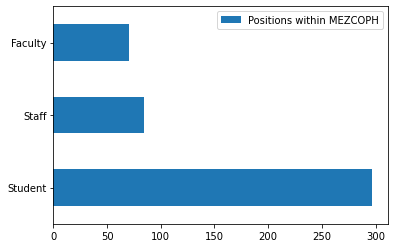

In [ ]:
#@title
# create new column with replaced cell values to fit our recoding and analysis

# Go in to column and replace the original cell value with target cell value
clean_df['Positions within MEZCOPH'] = clean_df['Position within MEZCOPH'].replace({'Undergraduate Student (including online, in person; phoenix campus) or Recent Graduate':'Student',
                                            "Graduate Student (including online, in person; phoenix campus) or Recent Graduate":'Student',
                                            'Tenured/Tenure-Track Faculty':'Faculty',
                                            'Career-Track Faculty (including Lecturers)':'Faculty',
                                            'Staff (including postdocs, visiting scholars, Administrator without Faculty title)':'Staff'})
# clean_df['Position_fac_staf_stud']

# review new column categories
print(clean_df['Positions within MEZCOPH'].value_counts())
clean_df['Positions within MEZCOPH'].value_counts().plot(kind='barh')
plt.legend()
# check that the new column is in the dataframe
# print(list(clean_df.columns)


In [ ]:
#@title
warnings.filterwarnings('ignore')

## Run function on Faculty VS Staff VS Students

# create new column with replaced cell values recoded to numbers to fit our recoding and analysis

# find all NaNs within the column
Position_na = clean_df['Positions within MEZCOPH'].isna()

# ignore NaNs or low valued categories from group of interest
clean_df_subset_pos = clean_df.loc[clean_df['Positions within MEZCOPH']!=Position_na].copy() 
# Call Function with df of interest and demographic group of interest
print("\033[1m" +"ASSUMPTION CHECKS: "+"\033[0m")
print("\n","1)", "For tables larger than 2x2, each cell should have an expected count of at least 5 for at least 80% of the cells.", "\n","2)", "No cell should have an expected count of 0.", "\n","-- So no more than 20% of cells should have an expected count less than 5, and none should be 0.","\n")
print("If at least one of the Assumption checks fail we find no significance for our test and skip the question. If the question passes both Assumption Checks then we can review the post-hoc significance of group categories.","\n")
print("\033[1m" +"Below are the results that pass BOTH Assumption checks"+"\033[0m","for the Chi-Square test, and we can review their post-hoc (Bonferroni) significance.","\n")
print("*"*120, "\n")
print("STUDENTS VS STAFF VS FACULTY", "\n")
print("_"*100, "\n")
Potential_Questions_of_Interest(clean_df_subset_pos, 'Positions within MEZCOPH')

ASSUMPTION CHECKS: 

 1) For tables larger than 2x2, each cell should have an expected count of at least 5 for at least 80% of the cells. 
 2) No cell should have an expected count of 0. 
 -- So no more than 20% of cells should have an expected count less than 5, and none should be 0. 

If at least one of the Assumption checks fail we find no significance for our test and skip the question. If the question passes both Assumption Checks then we can review the post-hoc significance of group categories. 

Below are the results that pass BOTH Assumption checks for the Chi-Square test, and we can review their post-hoc (Bonferroni) significance. 

************************************************************************************************************************ 

STUDENTS VS STAFF VS FACULTY 

____________________________________________________________________________________________________ 

Q7 : Have you ever seriously considered leaving MEZCOPH? 

CHI-SQUARE SIGNIFICANCE OVERVIEW: 

,Group,Selection,Original P-Value,Normalized Z-score,Post-Hoc,Significant Differences
0,Faculty,No,3.114893e-19,7.327472e-15,0.000000,Significant
1,Faculty,Yes,3.114893e-19,7.327472e-15,0.000000,Significant
2,Staff,No,3.114893e-19,9.639699e-04,0.002892,Significant
3,Staff,Yes,3.114893e-19,9.639699e-04,0.002892,Significant
4,Student,No,3.114893e-19,0.000000e+00,0.000000,Significant
5,Student,Yes,3.114893e-19,0.000000e+00,0.000000,Significant



 ************************* 
 
 Original Counts and Percentages for:Q7


,No,Yes
Student,80.0% (N=234),20.0% (N=59)
Staff,51.0% (N=42),49.0% (N=41)
Faculty,24.0% (N=16),76.0% (N=50)



 
 ------------------------------------------------------------------------------------------------------------------------ 
 

Q14 : Within the past year, have you personally experienced any exclusionary (e.g., shunned, ignored), intimidated, offended, and/or hostile conduct (e.g., bullied, harassed) that has interfered with your ability to learn, live, or work at MEZCOPH? 

CHI-SQUARE SIGNIFICANCE OVERVIEW: Q14
An omnibus chi-square test of independence shows that there is a significant association between Positions within MEZCOPH,and their responses to Q14. The chi-square significance test* shows: X²(2, N=426) = 23.15 p=0.0. 
 *We can read this as: X²(Degrees of Freedom, N=Sample Size) = Chi-square statistic, p-value. 

*************************
GROUP CATEGORY SIGNIFICANCE for Q14
This table shows the groups with/without statisticaly significant differences. The Post-Hoc test is a Bonferroni test with p-value significance at .05. 



,Group,Selection,Original P-Value,Normalized Z-score,Post-Hoc,Significant Differences
0,Faculty,No,0.000009,0.000004,0.000012,Significant
1,Faculty,Yes,0.000009,0.000004,0.000012,Significant
2,Staff,No,0.000009,0.674352,1.000000,Not Significant
3,Staff,Yes,0.000009,0.674352,1.000000,Not Significant
4,Student,No,0.000009,0.000126,0.000377,Significant
5,Student,Yes,0.000009,0.000126,0.000377,Significant



 ************************* 
 
 Original Counts and Percentages for:Q14


,Yes,No
Student,12.0% (N=35),88.0% (N=248)
Staff,19.0% (N=15),81.0% (N=64)
Faculty,38.0% (N=24),62.0% (N=40)



 
 ------------------------------------------------------------------------------------------------------------------------ 
 

Q170_1 : During the COVID-19 pandemic, to what extent do you agree with the following: - I am able to make my own decision on when or if I work remotely 

CHI-SQUARE SIGNIFICANCE OVERVIEW: Q170_1
An omnibus chi-square test of independence shows that there is a significant association between Positions within MEZCOPH,and their responses to Q170_1. The chi-square significance test* shows: X²(6, N=367) = 31.11 p=0.0. 
 *We can read this as: X²(Degrees of Freedom, N=Sample Size) = Chi-square statistic, p-value. 

*************************
GROUP CATEGORY SIGNIFICANCE for Q170_1
This table shows the groups with/without statisticaly significant differences. The Post-Hoc test is a Bonferroni test with p-value significance at .05. 



,Group,Selection,Original P-Value,Normalized Z-score,Post-Hoc,Significant Differences
0,Faculty,Somewhat agree,0.000024,1.208184e-01,0.362455,Not Significant
1,Faculty,Somewhat disagree,0.000024,8.304307e-03,0.024913,Significant
2,Faculty,Strongly agree,0.000024,2.878790e-05,0.000086,Significant
3,Faculty,Strongly disagree,0.000024,1.947634e-02,0.058429,Not Significant
4,Staff,Somewhat agree,0.000024,1.286400e-01,0.385920,Not Significant
5,Staff,Somewhat disagree,0.000024,9.262244e-01,1.000000,Not Significant
6,Staff,Strongly agree,0.000024,2.789533e-02,0.083686,Not Significant
7,Staff,Strongly disagree,0.000024,1.274746e-01,0.382424,Not Significant
8,Student,Somewhat agree,0.000024,1.549495e-02,0.046485,Significant
9,Student,Somewhat disagree,0.000024,3.624691e-02,0.108741,Not Significant



 ************************* 
 
 Original Counts and Percentages for:Q170_1


,Strongly agree,Strongly disagree,Somewhat agree,Somewhat disagree
Student,50.0% (N=122),11.0% (N=26),28.0% (N=69),12.0% (N=29)
Staff,71.0% (N=46),3.0% (N=2),17.0% (N=11),9.0% (N=6)
Faculty,84.0% (N=47),0.0% (N=0),16.0% (N=9),0.0% (N=0)



 
 ------------------------------------------------------------------------------------------------------------------------ 
 

Q170_6 : During the COVID-19 pandemic, to what extent do you agree with the following: - I am not being asked to perform at similar levels of productivity despite the current pandemic 

CHI-SQUARE SIGNIFICANCE OVERVIEW: Q170_6
An omnibus chi-square test of independence shows that there is a significant association between Positions within MEZCOPH,and their responses to Q170_6. The chi-square significance test* shows: X²(6, N=344) = 19.11 p=0.0. 
 *We can read this as: X²(Degrees of Freedom, N=Sample Size) = Chi-square statistic, p-value. 

*************************
GROUP CATEGORY SIGNIFICANCE for Q170_6
This table shows the groups with/without statisticaly significant differences. The Post-Hoc test is a Bonferroni test with p-value significance at .05. 



,Group,Selection,Original P-Value,Normalized Z-score,Post-Hoc,Significant Differences
0,Faculty,Somewhat agree,0.003975,0.035809,0.107426,Not Significant
1,Faculty,Somewhat disagree,0.003975,0.504281,1.000000,Not Significant
2,Faculty,Strongly agree,0.003975,0.112700,0.338100,Not Significant
3,Faculty,Strongly disagree,0.003975,0.010053,0.030159,Significant
4,Staff,Somewhat agree,0.003975,0.113809,0.341426,Not Significant
5,Staff,Somewhat disagree,0.003975,0.887159,1.000000,Not Significant
6,Staff,Strongly agree,0.003975,0.476083,1.000000,Not Significant
7,Staff,Strongly disagree,0.003975,0.033165,0.099494,Not Significant
8,Student,Somewhat agree,0.003975,0.004087,0.012261,Significant
9,Student,Somewhat disagree,0.003975,0.695872,1.000000,Not Significant



 ************************* 
 
 Original Counts and Percentages for:Q170_6


,Somewhat disagree,Strongly disagree,Strongly agree,Somewhat agree
Student,26.0% (N=60),26.0% (N=61),23.0% (N=54),26.0% (N=60)
Staff,25.0% (N=15),44.0% (N=26),17.0% (N=10),14.0% (N=8)
Faculty,30.0% (N=15),48.0% (N=24),12.0% (N=6),10.0% (N=5)



 
 ------------------------------------------------------------------------------------------------------------------------ 
 

Q170_8 : During the COVID-19 pandemic, to what extent do you agree with the following: - I am given flexibility due to the current situation 

CHI-SQUARE SIGNIFICANCE OVERVIEW: Q170_8
An omnibus chi-square test of independence shows that there is a significant association between Positions within MEZCOPH,and their responses to Q170_8. The chi-square significance test* shows: X²(6, N=370) = 25.3 p=0.0. 
 *We can read this as: X²(Degrees of Freedom, N=Sample Size) = Chi-square statistic, p-value. 

*************************
GROUP CATEGORY SIGNIFICANCE for Q170_8
This table shows the groups with/without statisticaly significant differences. The Post-Hoc test is a Bonferroni test with p-value significance at .05. 



,Group,Selection,Original P-Value,Normalized Z-score,Post-Hoc,Significant Differences
0,Faculty,Somewhat agree,0.0003,0.259014,0.777043,Not Significant
1,Faculty,Somewhat disagree,0.0003,0.064175,0.192525,Not Significant
2,Faculty,Strongly agree,0.0003,0.383925,1.000000,Not Significant
3,Faculty,Strongly disagree,0.0003,0.150632,0.451896,Not Significant
4,Staff,Somewhat agree,0.0003,0.954742,1.000000,Not Significant
5,Staff,Somewhat disagree,0.0003,0.016815,0.050445,Not Significant
6,Staff,Strongly agree,0.0003,0.005195,0.015586,Significant
7,Staff,Strongly disagree,0.0003,0.019874,0.059623,Not Significant
8,Student,Somewhat agree,0.0003,0.370235,1.000000,Not Significant
9,Student,Somewhat disagree,0.0003,0.000792,0.002377,Significant



 ************************* 
 
 Original Counts and Percentages for:Q170_8


,Somewhat agree,Strongly agree,Strongly disagree,Somewhat disagree
Student,41.0% (N=103),32.0% (N=80),9.0% (N=22),18.0% (N=44)
Staff,43.0% (N=29),52.0% (N=35),0.0% (N=0),4.0% (N=3)
Faculty,50.0% (N=27),43.0% (N=23),2.0% (N=1),6.0% (N=3)



 
 ------------------------------------------------------------------------------------------------------------------------ 
 

Q170_10 : During the COVID-19 pandemic, to what extent do you agree with the following: - MEZCOPH provides opportunities for discussion and interaction around social and racial injustice issues 

CHI-SQUARE SIGNIFICANCE OVERVIEW: Q170_10
An omnibus chi-square test of independence shows that there is a significant association between Positions within MEZCOPH,and their responses to Q170_10. The chi-square significance test* shows: X²(6, N=364) = 21.83 p=0.0. 
 *We can read this as: X²(Degrees of Freedom, N=Sample Size) = Chi-square statistic, p-value. 

*************************
GROUP CATEGORY SIGNIFICANCE for Q170_10
This table shows the groups with/without statisticaly significant differences. The Post-Hoc test is a Bonferroni test with p-value significance at .05. 



,Group,Selection,Original P-Value,Normalized Z-score,Post-Hoc,Significant Differences
0,Faculty,Somewhat agree,0.001302,0.836872,1.000000,Not Significant
1,Faculty,Somewhat disagree,0.001302,0.003720,0.011161,Significant
2,Faculty,Strongly agree,0.001302,0.058775,0.176326,Not Significant
3,Faculty,Strongly disagree,0.001302,0.876022,1.000000,Not Significant
4,Staff,Somewhat agree,0.001302,0.004624,0.013873,Significant
5,Staff,Somewhat disagree,0.001302,0.933442,1.000000,Not Significant
6,Staff,Strongly agree,0.001302,0.002360,0.007079,Significant
7,Staff,Strongly disagree,0.001302,0.683160,1.000000,Not Significant
8,Student,Somewhat agree,0.001302,0.031323,0.093969,Not Significant
9,Student,Somewhat disagree,0.001302,0.023887,0.071662,Not Significant



 ************************* 
 
 Original Counts and Percentages for:Q170_10


,Somewhat disagree,Somewhat agree,Strongly disagree,Strongly agree
Student,11.0% (N=27),35.0% (N=87),5.0% (N=12),49.0% (N=121)
Staff,14.0% (N=9),55.0% (N=35),6.0% (N=4),25.0% (N=16)
Faculty,26.0% (N=14),38.0% (N=20),6.0% (N=3),30.0% (N=16)



 
 ------------------------------------------------------------------------------------------------------------------------ 
 

Q170_12 : During the COVID-19 pandemic, to what extent do you agree with the following: - I feel like MEZCOPH has provided opportunities for input and guidance on phases of reentry 

CHI-SQUARE SIGNIFICANCE OVERVIEW: Q170_12
An omnibus chi-square test of independence shows that there is a significant association between Positions within MEZCOPH,and their responses to Q170_12. The chi-square significance test* shows: X²(6, N=361) = 17.43 p=0.01. 
 *We can read this as: X²(Degrees of Freedom, N=Sample Size) = Chi-square statistic, p-value. 

*************************
GROUP CATEGORY SIGNIFICANCE for Q170_12
This table shows the groups with/without statisticaly significant differences. The Post-Hoc test is a Bonferroni test with p-value significance at .05. 



,Group,Selection,Original P-Value,Normalized Z-score,Post-Hoc,Significant Differences
0,Faculty,Somewhat agree,0.007817,0.361744,1.000000,Not Significant
1,Faculty,Somewhat disagree,0.007817,0.479457,1.000000,Not Significant
2,Faculty,Strongly agree,0.007817,0.296713,0.890140,Not Significant
3,Faculty,Strongly disagree,0.007817,0.018212,0.054635,Not Significant
4,Staff,Somewhat agree,0.007817,0.948232,1.000000,Not Significant
5,Staff,Somewhat disagree,0.007817,0.110889,0.332668,Not Significant
6,Staff,Strongly agree,0.007817,0.027165,0.081494,Not Significant
7,Staff,Strongly disagree,0.007817,0.094682,0.284047,Not Significant
8,Student,Somewhat agree,0.007817,0.458488,1.000000,Not Significant
9,Student,Somewhat disagree,0.007817,0.065848,0.197544,Not Significant



 ************************* 
 
 Original Counts and Percentages for:Q170_12


,Somewhat disagree,Somewhat agree,Strongly disagree,Strongly agree
Student,16.0% (N=40),37.0% (N=90),5.0% (N=13),41.0% (N=100)
Staff,26.0% (N=17),35.0% (N=23),14.0% (N=9),25.0% (N=16)
Faculty,23.0% (N=12),30.0% (N=16),17.0% (N=9),30.0% (N=16)



 
 ------------------------------------------------------------------------------------------------------------------------ 
 

Q170_14 : During the COVID-19 pandemic, to what extent do you agree with the following: - I feel there has been clear communication regarding financial support (i.e. assistantships, furloughs/furlough-based salary program) 

CHI-SQUARE SIGNIFICANCE OVERVIEW: Q170_14
An omnibus chi-square test of independence shows that there is a significant association between Positions within MEZCOPH,and their responses to Q170_14. The chi-square significance test* shows: X²(6, N=355) = 38.27 p=0.0. 
 *We can read this as: X²(Degrees of Freedom, N=Sample Size) = Chi-square statistic, p-value. 

*************************
GROUP CATEGORY SIGNIFICANCE for Q170_14
This table shows the groups with/without statisticaly significant differences. The Post-Hoc test is a Bonferroni test with p-value significance at .05. 



,Group,Selection,Original P-Value,Normalized Z-score,Post-Hoc,Significant Differences
0,Faculty,Somewhat agree,9.955378e-07,2.271438e-02,0.068143,Not Significant
1,Faculty,Somewhat disagree,9.955378e-07,4.589320e-01,1.000000,Not Significant
2,Faculty,Strongly agree,9.955378e-07,1.481146e-02,0.044434,Significant
3,Faculty,Strongly disagree,9.955378e-07,6.262052e-07,0.000002,Significant
4,Staff,Somewhat agree,9.955378e-07,2.766735e-01,0.830021,Not Significant
5,Staff,Somewhat disagree,9.955378e-07,7.657976e-02,0.229739,Not Significant
6,Staff,Strongly agree,9.955378e-07,2.088507e-02,0.062655,Not Significant
7,Staff,Strongly disagree,9.955378e-07,5.063002e-01,1.000000,Not Significant
8,Student,Somewhat agree,9.955378e-07,4.129695e-01,1.000000,Not Significant
9,Student,Somewhat disagree,9.955378e-07,4.399775e-02,0.131993,Not Significant



 ************************* 
 
 Original Counts and Percentages for:Q170_14


,Strongly disagree,Somewhat agree,Somewhat disagree,Strongly agree
Student,12.0% (N=29),39.0% (N=92),18.0% (N=43),31.0% (N=74)
Staff,14.0% (N=9),43.0% (N=28),29.0% (N=19),14.0% (N=9)
Faculty,40.0% (N=21),23.0% (N=12),25.0% (N=13),12.0% (N=6)



 
 ------------------------------------------------------------------------------------------------------------------------ 
 

Q170_16 : During the COVID-19 pandemic, to what extent do you agree with the following: - I feel like the adaptations for the milesstone advancement/tenure/promotion process have been appropriate and clearly communicated 

CHI-SQUARE SIGNIFICANCE OVERVIEW: Q170_16
An omnibus chi-square test of independence shows that there is a significant association between Positions within MEZCOPH,and their responses to Q170_16. The chi-square significance test* shows: X²(6, N=298) = 49.53 p=0.0. 
 *We can read this as: X²(Degrees of Freedom, N=Sample Size) = Chi-square statistic, p-value. 

*************************
GROUP CATEGORY SIGNIFICANCE for Q170_16
This table shows the groups with/without statisticaly significant differences. The Post-Hoc test is a Bonferroni test with p-value significance at .05. 



,Group,Selection,Original P-Value,Normalized Z-score,Post-Hoc,Significant Differences
0,Faculty,Somewhat agree,5.848113e-09,6.834734e-01,1.000000,Not Significant
1,Faculty,Somewhat disagree,5.848113e-09,4.350322e-02,0.130510,Not Significant
2,Faculty,Strongly agree,5.848113e-09,8.469480e-04,0.002541,Significant
3,Faculty,Strongly disagree,5.848113e-09,2.783251e-01,0.834975,Not Significant
4,Staff,Somewhat agree,5.848113e-09,1.515101e-02,0.045453,Significant
5,Staff,Somewhat disagree,5.848113e-09,1.287314e-05,0.000039,Significant
6,Staff,Strongly agree,5.848113e-09,7.703538e-04,0.002311,Significant
7,Staff,Strongly disagree,5.848113e-09,5.623813e-02,0.168714,Not Significant
8,Student,Somewhat agree,5.848113e-09,1.209313e-01,0.362794,Not Significant
9,Student,Somewhat disagree,5.848113e-09,5.662450e-07,0.000002,Significant



 ************************* 
 
 Original Counts and Percentages for:Q170_16


,Somewhat disagree,Somewhat agree,Strongly agree,Strongly disagree
Student,20.0% (N=39),35.0% (N=70),36.0% (N=71),10.0% (N=19)
Staff,55.0% (N=26),17.0% (N=8),6.0% (N=3),21.0% (N=10)
Faculty,40.0% (N=21),35.0% (N=18),8.0% (N=4),17.0% (N=9)



 
 ------------------------------------------------------------------------------------------------------------------------ 
 



In [ ]:
#@title
warnings.filterwarnings('ignore')

## Run function on Students vs Students
clean_df["Graduate and Undergraduate Students"] = clean_df['Position within MEZCOPH'].replace({'Graduate Student (including online, in person; phoenix campus) or Recent Graduate': "Grad Student",'Undergraduate Student (including online, in person; phoenix campus) or Recent Graduate': "Undergrad Student"})

# create new column with dropped categories we don't need
clean_df_subset_students = clean_df[~(clean_df['Graduate and Undergraduate Students'].isin(["Staff (including postdocs, visiting scholars, Administrator without Faculty title)",
                                                                                "Tenured/Tenure-Track Faculty",
                                                                                "Career-Track Faculty (including Lecturers)"]))]
# Call Function with df of interest and demographic group of interest
print("\033[1m" +"ASSUMPTION CHECKS: "+"\033[0m")
print("\n","1)", "For tables larger than 2x2, each cell should have an expected count of at least 5 for at least 80% of the cells.", "\n","2)", "No cell should have an expected count of 0.", "\n","-- So no more than 20% of cells should have an expected count less than 5, and none should be 0.","\n")
print("If at least one of the Assumption checks fail we find no significance for our test and skip the question. If the question passes both Assumption Checks then we can review the post-hoc significance of group categories.","\n")
print("\033[1m" +"Below are the results that pass BOTH Assumption checks"+"\033[0m","for the Chi-Square test, and we can review their post-hoc (Bonferroni) significance.","\n")
print("*"*120, "\n")
print("GRADUATE STUDENTS VS UNDERGRADUATE STUDENTS", "\n")
print("_"*100, "\n")
Potential_Questions_of_Interest(clean_df_subset_students, 'Graduate and Undergraduate Students')

ASSUMPTION CHECKS: 

 1) For tables larger than 2x2, each cell should have an expected count of at least 5 for at least 80% of the cells. 
 2) No cell should have an expected count of 0. 
 -- So no more than 20% of cells should have an expected count less than 5, and none should be 0. 

If at least one of the Assumption checks fail we find no significance for our test and skip the question. If the question passes both Assumption Checks then we can review the post-hoc significance of group categories. 

Below are the results that pass BOTH Assumption checks for the Chi-Square test, and we can review their post-hoc (Bonferroni) significance. 

************************************************************************************************************************ 

GRADUATE STUDENTS VS UNDERGRADUATE STUDENTS 

____________________________________________________________________________________________________ 

Q13_2 : Please indicate the extent to which you agree with each of the followi

,Group,Selection,Original P-Value,Normalized Z-score,Post-Hoc,Significant Differences
0,Grad Student,Agree,0.014528,0.501413,1.000000,Not Significant
1,Grad Student,Disagree,0.014528,0.601266,1.000000,Not Significant
2,Grad Student,Neither agree nor disagree,0.014528,0.044113,0.088227,Not Significant
3,Grad Student,Strongly agree,0.014528,0.001207,0.002413,Significant
4,Grad Student,Strongly disagree,0.014528,0.373486,0.746973,Not Significant
5,Undergrad Student,Agree,0.014528,0.501413,1.000000,Not Significant
6,Undergrad Student,Disagree,0.014528,0.601266,1.000000,Not Significant
7,Undergrad Student,Neither agree nor disagree,0.014528,0.044113,0.088227,Not Significant
8,Undergrad Student,Strongly agree,0.014528,0.001207,0.002413,Significant
9,Undergrad Student,Strongly disagree,0.014528,0.373486,0.746973,Not Significant



 ************************* 
 
 Original Counts and Percentages for:Q13_2


,Strongly disagree,Disagree,Neither agree nor disagree,Agree,Strongly agree
Grad Student,4.0% (N=5),10.0% (N=13),23.0% (N=31),47.0% (N=63),16.0% (N=22)
Undergrad Student,2.0% (N=3),8.0% (N=12),14.0% (N=21),43.0% (N=65),33.0% (N=50)



 
 ------------------------------------------------------------------------------------------------------------------------ 
 

Q14 : Within the past year, have you personally experienced any exclusionary (e.g., shunned, ignored), intimidated, offended, and/or hostile conduct (e.g., bullied, harassed) that has interfered with your ability to learn, live, or work at MEZCOPH? 

CHI-SQUARE SIGNIFICANCE OVERVIEW: Q14
An omnibus chi-square test of independence shows that there is a significant association between Graduate and Undergraduate Students,and their responses to Q14. The chi-square significance test* shows: X²(1, N=283) = 8.75 p=0.0. 
 *We can read this as: X²(Degrees of Freedom, N=Sample Size) = Chi-square statistic, p-value. 

*************************
GROUP CATEGORY SIGNIFICANCE for Q14
This table shows the groups with/without statisticaly significant differences. The Post-Hoc test is a Bonferroni test with p-value significance at .05. 



,Group,Selection,Original P-Value,Normalized Z-score,Post-Hoc,Significant Differences
0,Grad Student,No,0.003088,0.00169,0.003381,Significant
1,Grad Student,Yes,0.003088,0.00169,0.003381,Significant
2,Undergrad Student,No,0.003088,0.00169,0.003381,Significant
3,Undergrad Student,Yes,0.003088,0.00169,0.003381,Significant



 ************************* 
 
 Original Counts and Percentages for:Q14


,Yes,No
Grad Student,19.0% (N=25),81.0% (N=107)
Undergrad Student,7.0% (N=10),93.0% (N=141)



 
 ------------------------------------------------------------------------------------------------------------------------ 
 

Q111_7 : Please indicate the extent to which you agree with each of the following statements. - I think that faculty prejudge my abilities based on their perception of my identity/background 

CHI-SQUARE SIGNIFICANCE OVERVIEW: Q111_7
An omnibus chi-square test of independence shows that there is a significant association between Graduate and Undergraduate Students,and their responses to Q111_7. The chi-square significance test* shows: X²(5, N=266) = 16.24 p=0.01. 
 *We can read this as: X²(Degrees of Freedom, N=Sample Size) = Chi-square statistic, p-value. 

*************************
GROUP CATEGORY SIGNIFICANCE for Q111_7
This table shows the groups with/without statisticaly significant differences. The Post-Hoc test is a Bonferroni test with p-value significance at .05. 



,Group,Selection,Original P-Value,Normalized Z-score,Post-Hoc,Significant Differences
0,Grad Student,Agree,0.006179,0.313650,0.627300,Not Significant
1,Grad Student,Disagree,0.006179,0.880558,1.000000,Not Significant
2,Grad Student,Neither agree nor disagree,0.006179,0.036338,0.072676,Not Significant
3,Grad Student,Not Applicable,0.006179,0.640792,1.000000,Not Significant
4,Grad Student,Strongly agree,0.006179,0.001516,0.003032,Significant
5,Grad Student,Strongly disagree,0.006179,0.053149,0.106298,Not Significant
6,Undergrad Student,Agree,0.006179,0.313650,0.627300,Not Significant
7,Undergrad Student,Disagree,0.006179,0.880558,1.000000,Not Significant
8,Undergrad Student,Neither agree nor disagree,0.006179,0.036338,0.072676,Not Significant
9,Undergrad Student,Not Applicable,0.006179,0.640792,1.000000,Not Significant



 ************************* 
 
 Original Counts and Percentages for:Q111_7


,Strongly disagree,Disagree,Neither agree nor disagree,Agree,Strongly agree
Grad Student,24.0% (N=28),22.0% (N=26),24.0% (N=29),19.0% (N=23),7.0% (N=8)
Undergrad Student,14.0% (N=21),21.0% (N=31),14.0% (N=21),24.0% (N=36),20.0% (N=30)



 
 ------------------------------------------------------------------------------------------------------------------------ 
 

Q111_8 : Please indicate the extent to which you agree with each of the following statements. - I believe that the campus climate encourages free and open discussion of difficult topics 

CHI-SQUARE SIGNIFICANCE OVERVIEW: Q111_8
An omnibus chi-square test of independence shows that there is a significant association between Graduate and Undergraduate Students,and their responses to Q111_8. The chi-square significance test* shows: X²(4, N=266) = 34.57 p=0.0. 
 *We can read this as: X²(Degrees of Freedom, N=Sample Size) = Chi-square statistic, p-value. 

*************************
GROUP CATEGORY SIGNIFICANCE for Q111_8
This table shows the groups with/without statisticaly significant differences. The Post-Hoc test is a Bonferroni test with p-value significance at .05. 



,Group,Selection,Original P-Value,Normalized Z-score,Post-Hoc,Significant Differences
0,Grad Student,Agree,5.701567e-07,0.030381,0.060762,Not Significant
1,Grad Student,Disagree,5.701567e-07,0.035207,0.070414,Not Significant
2,Grad Student,Neither agree nor disagree,5.701567e-07,0.000490,0.000980,Significant
3,Grad Student,Strongly agree,5.701567e-07,0.001808,0.003615,Significant
4,Grad Student,Strongly disagree,5.701567e-07,0.000820,0.001640,Significant
5,Undergrad Student,Agree,5.701567e-07,0.030381,0.060762,Not Significant
6,Undergrad Student,Disagree,5.701567e-07,0.035207,0.070414,Not Significant
7,Undergrad Student,Neither agree nor disagree,5.701567e-07,0.000490,0.000980,Significant
8,Undergrad Student,Strongly agree,5.701567e-07,0.001808,0.003615,Significant
9,Undergrad Student,Strongly disagree,5.701567e-07,0.000820,0.001640,Significant



 ************************* 
 
 Original Counts and Percentages for:Q111_8


,Strongly disagree,Disagree,Neither agree nor disagree,Agree,Strongly agree
Grad Student,9.0% (N=11),12.0% (N=14),24.0% (N=28),34.0% (N=41),21.0% (N=25)
Undergrad Student,1.0% (N=1),5.0% (N=7),8.0% (N=12),48.0% (N=70),39.0% (N=57)



 
 ------------------------------------------------------------------------------------------------------------------------ 
 

Q170_3 : During the COVID-19 pandemic, to what extent do you agree with the following: - I have consistent and reliable internet access 

CHI-SQUARE SIGNIFICANCE OVERVIEW: Q170_3
An omnibus chi-square test of independence shows that there is a significant association between Graduate and Undergraduate Students,and their responses to Q170_3. The chi-square significance test* shows: X²(3, N=256) = 13.44 p=0.0. 
 *We can read this as: X²(Degrees of Freedom, N=Sample Size) = Chi-square statistic, p-value. 

*************************
GROUP CATEGORY SIGNIFICANCE for Q170_3
This table shows the groups with/without statisticaly significant differences. The Post-Hoc test is a Bonferroni test with p-value significance at .05. 



,Group,Selection,Original P-Value,Normalized Z-score,Post-Hoc,Significant Differences
0,Grad Student,Somewhat agree,0.003775,0.002239,0.004479,Significant
1,Grad Student,Somewhat disagree,0.003775,0.028594,0.057189,Not Significant
2,Grad Student,Strongly agree,0.003775,0.279995,0.559991,Not Significant
3,Grad Student,Strongly disagree,0.003775,0.106035,0.212071,Not Significant
4,Undergrad Student,Somewhat agree,0.003775,0.002239,0.004479,Significant
5,Undergrad Student,Somewhat disagree,0.003775,0.028594,0.057189,Not Significant
6,Undergrad Student,Strongly agree,0.003775,0.279995,0.559991,Not Significant
7,Undergrad Student,Strongly disagree,0.003775,0.106035,0.212071,Not Significant



 ************************* 
 
 Original Counts and Percentages for:Q170_3


,Strongly agree,Somewhat agree,Somewhat disagree,Strongly disagree
Grad Student,48.0% (N=55),46.0% (N=53),4.0% (N=5),2.0% (N=2)
Undergrad Student,55.0% (N=77),28.0% (N=39),12.0% (N=17),6.0% (N=8)



 
 ------------------------------------------------------------------------------------------------------------------------ 
 

Q170_7 : During the COVID-19 pandemic, to what extent do you agree with the following: - I am being asked to perform at higher levels of productivity (via increased expectations or roles) 

CHI-SQUARE SIGNIFICANCE OVERVIEW: Q170_7
An omnibus chi-square test of independence shows that there is a significant association between Graduate and Undergraduate Students,and their responses to Q170_7. The chi-square significance test* shows: X²(3, N=240) = 16.2 p=0.0. 
 *We can read this as: X²(Degrees of Freedom, N=Sample Size) = Chi-square statistic, p-value. 

*************************
GROUP CATEGORY SIGNIFICANCE for Q170_7
This table shows the groups with/without statisticaly significant differences. The Post-Hoc test is a Bonferroni test with p-value significance at .05. 



,Group,Selection,Original P-Value,Normalized Z-score,Post-Hoc,Significant Differences
0,Grad Student,Somewhat agree,0.001031,0.578001,1.000000,Not Significant
1,Grad Student,Somewhat disagree,0.001031,0.184988,0.369976,Not Significant
2,Grad Student,Strongly agree,0.001031,0.002044,0.004088,Significant
3,Grad Student,Strongly disagree,0.001031,0.002710,0.005421,Significant
4,Undergrad Student,Somewhat agree,0.001031,0.578001,1.000000,Not Significant
5,Undergrad Student,Somewhat disagree,0.001031,0.184988,0.369976,Not Significant
6,Undergrad Student,Strongly agree,0.001031,0.002044,0.004088,Significant
7,Undergrad Student,Strongly disagree,0.001031,0.002710,0.005421,Significant



 ************************* 
 
 Original Counts and Percentages for:Q170_7


,Somewhat agree,Somewhat disagree,Strongly agree,Strongly disagree
Grad Student,31.0% (N=31),30.0% (N=30),16.0% (N=16),22.0% (N=22)
Undergrad Student,35.0% (N=49),23.0% (N=32),34.0% (N=48),9.0% (N=12)



 
 ------------------------------------------------------------------------------------------------------------------------ 
 

Q170_9 : During the COVID-19 pandemic, to what extent do you agree with the following: - I feel safe when working in person 

CHI-SQUARE SIGNIFICANCE OVERVIEW: Q170_9
An omnibus chi-square test of independence shows that there is a significant association between Graduate and Undergraduate Students,and their responses to Q170_9. The chi-square significance test* shows: X²(3, N=203) = 10.82 p=0.01. 
 *We can read this as: X²(Degrees of Freedom, N=Sample Size) = Chi-square statistic, p-value. 

*************************
GROUP CATEGORY SIGNIFICANCE for Q170_9
This table shows the groups with/without statisticaly significant differences. The Post-Hoc test is a Bonferroni test with p-value significance at .05. 



,Group,Selection,Original P-Value,Normalized Z-score,Post-Hoc,Significant Differences
0,Grad Student,Somewhat agree,0.012757,0.381525,0.763051,Not Significant
1,Grad Student,Somewhat disagree,0.012757,0.519259,1.000000,Not Significant
2,Grad Student,Strongly agree,0.012757,0.037542,0.075083,Not Significant
3,Grad Student,Strongly disagree,0.012757,0.003771,0.007542,Significant
4,Undergrad Student,Somewhat agree,0.012757,0.381525,0.763051,Not Significant
5,Undergrad Student,Somewhat disagree,0.012757,0.519259,1.000000,Not Significant
6,Undergrad Student,Strongly agree,0.012757,0.037542,0.075083,Not Significant
7,Undergrad Student,Strongly disagree,0.012757,0.003771,0.007542,Significant



 ************************* 
 
 Original Counts and Percentages for:Q170_9


,Strongly agree,Somewhat disagree,Strongly disagree,Somewhat agree
Grad Student,23.0% (N=17),27.0% (N=20),27.0% (N=20),24.0% (N=18)
Undergrad Student,37.0% (N=47),23.0% (N=29),11.0% (N=14),30.0% (N=38)



 
 ------------------------------------------------------------------------------------------------------------------------ 
 

Q170_10 : During the COVID-19 pandemic, to what extent do you agree with the following: - MEZCOPH provides opportunities for discussion and interaction around social and racial injustice issues 

CHI-SQUARE SIGNIFICANCE OVERVIEW: Q170_10
An omnibus chi-square test of independence shows that there is a significant association between Graduate and Undergraduate Students,and their responses to Q170_10. The chi-square significance test* shows: X²(3, N=247) = 30.26 p=0.0. 
 *We can read this as: X²(Degrees of Freedom, N=Sample Size) = Chi-square statistic, p-value. 

*************************
GROUP CATEGORY SIGNIFICANCE for Q170_10
This table shows the groups with/without statisticaly significant differences. The Post-Hoc test is a Bonferroni test with p-value significance at .05. 



,Group,Selection,Original P-Value,Normalized Z-score,Post-Hoc,Significant Differences
0,Grad Student,Somewhat agree,0.000001,0.182919,0.365838,Not Significant
1,Grad Student,Somewhat disagree,0.000001,0.032735,0.065470,Not Significant
2,Grad Student,Strongly agree,0.000001,0.000014,0.000029,Significant
3,Grad Student,Strongly disagree,0.000001,0.000056,0.000112,Significant
4,Undergrad Student,Somewhat agree,0.000001,0.182919,0.365838,Not Significant
5,Undergrad Student,Somewhat disagree,0.000001,0.032735,0.065470,Not Significant
6,Undergrad Student,Strongly agree,0.000001,0.000014,0.000029,Significant
7,Undergrad Student,Strongly disagree,0.000001,0.000056,0.000112,Significant



 ************************* 
 
 Original Counts and Percentages for:Q170_10


,Somewhat disagree,Strongly agree,Somewhat agree,Strongly disagree
Grad Student,16.0% (N=17),33.0% (N=36),40.0% (N=43),11.0% (N=12)
Undergrad Student,7.0% (N=10),61.0% (N=85),32.0% (N=44),0.0% (N=0)



 
 ------------------------------------------------------------------------------------------------------------------------ 
 

Q170_12 : During the COVID-19 pandemic, to what extent do you agree with the following: - I feel like MEZCOPH has provided opportunities for input and guidance on phases of reentry 

CHI-SQUARE SIGNIFICANCE OVERVIEW: Q170_12
An omnibus chi-square test of independence shows that there is a significant association between Graduate and Undergraduate Students,and their responses to Q170_12. The chi-square significance test* shows: X²(3, N=243) = 22.73 p=0.0. 
 *We can read this as: X²(Degrees of Freedom, N=Sample Size) = Chi-square statistic, p-value. 

*************************
GROUP CATEGORY SIGNIFICANCE for Q170_12
This table shows the groups with/without statisticaly significant differences. The Post-Hoc test is a Bonferroni test with p-value significance at .05. 



,Group,Selection,Original P-Value,Normalized Z-score,Post-Hoc,Significant Differences
0,Grad Student,Somewhat agree,0.000046,0.866200,1.000000,Not Significant
1,Grad Student,Somewhat disagree,0.000046,0.003471,0.006943,Significant
2,Grad Student,Strongly agree,0.000046,0.000621,0.001242,Significant
3,Grad Student,Strongly disagree,0.000046,0.002448,0.004897,Significant
4,Undergrad Student,Somewhat agree,0.000046,0.866200,1.000000,Not Significant
5,Undergrad Student,Somewhat disagree,0.000046,0.003471,0.006943,Significant
6,Undergrad Student,Strongly agree,0.000046,0.000621,0.001242,Significant
7,Undergrad Student,Strongly disagree,0.000046,0.002448,0.004897,Significant



 ************************* 
 
 Original Counts and Percentages for:Q170_12


,Somewhat disagree,Somewhat agree,Strongly agree,Strongly disagree
Grad Student,24.0% (N=26),36.0% (N=39),29.0% (N=31),10.0% (N=11)
Undergrad Student,10.0% (N=14),38.0% (N=51),51.0% (N=69),1.0% (N=2)



 
 ------------------------------------------------------------------------------------------------------------------------ 
 

Q170_3 : During the COVID-19 pandemic, to what extent do you agree with the following: - I have consistent and reliable internet access 

CHI-SQUARE SIGNIFICANCE OVERVIEW: Q170_3
An omnibus chi-square test of independence shows that there is a significant association between Graduate and Undergraduate Students,and their responses to Q170_3. The chi-square significance test* shows: X²(3, N=256) = 13.44 p=0.0. 
 *We can read this as: X²(Degrees of Freedom, N=Sample Size) = Chi-square statistic, p-value. 

*************************
GROUP CATEGORY SIGNIFICANCE for Q170_3
This table shows the groups with/without statisticaly significant differences. The Post-Hoc test is a Bonferroni test with p-value significance at .05. 



,Group,Selection,Original P-Value,Normalized Z-score,Post-Hoc,Significant Differences
0,Grad Student,Somewhat agree,0.003775,0.002239,0.004479,Significant
1,Grad Student,Somewhat disagree,0.003775,0.028594,0.057189,Not Significant
2,Grad Student,Strongly agree,0.003775,0.279995,0.559991,Not Significant
3,Grad Student,Strongly disagree,0.003775,0.106035,0.212071,Not Significant
4,Undergrad Student,Somewhat agree,0.003775,0.002239,0.004479,Significant
5,Undergrad Student,Somewhat disagree,0.003775,0.028594,0.057189,Not Significant
6,Undergrad Student,Strongly agree,0.003775,0.279995,0.559991,Not Significant
7,Undergrad Student,Strongly disagree,0.003775,0.106035,0.212071,Not Significant



 ************************* 
 
 Original Counts and Percentages for:Q170_3


,Strongly agree,Somewhat agree,Somewhat disagree,Strongly disagree
Grad Student,48.0% (N=55),46.0% (N=53),4.0% (N=5),2.0% (N=2)
Undergrad Student,55.0% (N=77),28.0% (N=39),12.0% (N=17),6.0% (N=8)



 
 ------------------------------------------------------------------------------------------------------------------------ 
 

Q170_14 : During the COVID-19 pandemic, to what extent do you agree with the following: - I feel there has been clear communication regarding financial support (i.e. assistantships, furloughs/furlough-based salary program) 

CHI-SQUARE SIGNIFICANCE OVERVIEW: Q170_14
An omnibus chi-square test of independence shows that there is a significant association between Graduate and Undergraduate Students,and their responses to Q170_14. The chi-square significance test* shows: X²(3, N=238) = 9.74 p=0.02. 
 *We can read this as: X²(Degrees of Freedom, N=Sample Size) = Chi-square statistic, p-value. 

*************************
GROUP CATEGORY SIGNIFICANCE for Q170_14
This table shows the groups with/without statisticaly significant differences. The Post-Hoc test is a Bonferroni test with p-value significance at .05. 



,Group,Selection,Original P-Value,Normalized Z-score,Post-Hoc,Significant Differences
0,Grad Student,Somewhat agree,0.020895,0.517916,1.000000,Not Significant
1,Grad Student,Somewhat disagree,0.020895,0.992038,1.000000,Not Significant
2,Grad Student,Strongly agree,0.020895,0.014736,0.029473,Significant
3,Grad Student,Strongly disagree,0.020895,0.013260,0.026519,Significant
4,Undergrad Student,Somewhat agree,0.020895,0.517916,1.000000,Not Significant
5,Undergrad Student,Somewhat disagree,0.020895,0.992038,1.000000,Not Significant
6,Undergrad Student,Strongly agree,0.020895,0.014736,0.029473,Significant
7,Undergrad Student,Strongly disagree,0.020895,0.013260,0.026519,Significant



 ************************* 
 
 Original Counts and Percentages for:Q170_14


,Strongly disagree,Somewhat agree,Strongly agree,Somewhat disagree
Grad Student,18.0% (N=19),41.0% (N=43),23.0% (N=24),18.0% (N=19)
Undergrad Student,8.0% (N=10),37.0% (N=49),38.0% (N=50),18.0% (N=24)



 
 ------------------------------------------------------------------------------------------------------------------------ 
 

Q170_15 : During the COVID-19 pandemic, to what extent do you agree with the following: - I feel I have adequate access to faculty, leadership, and mentorship 

CHI-SQUARE SIGNIFICANCE OVERVIEW: Q170_15
An omnibus chi-square test of independence shows that there is a significant association between Graduate and Undergraduate Students,and their responses to Q170_15. The chi-square significance test* shows: X²(3, N=249) = 13.14 p=0.0. 
 *We can read this as: X²(Degrees of Freedom, N=Sample Size) = Chi-square statistic, p-value. 

*************************
GROUP CATEGORY SIGNIFICANCE for Q170_15
This table shows the groups with/without statisticaly significant differences. The Post-Hoc test is a Bonferroni test with p-value significance at .05. 



,Group,Selection,Original P-Value,Normalized Z-score,Post-Hoc,Significant Differences
0,Grad Student,Somewhat agree,0.004348,0.957212,1.000000,Not Significant
1,Grad Student,Somewhat disagree,0.004348,0.020824,0.041648,Significant
2,Grad Student,Strongly agree,0.004348,0.004134,0.008268,Significant
3,Grad Student,Strongly disagree,0.004348,0.050294,0.100588,Not Significant
4,Undergrad Student,Somewhat agree,0.004348,0.957212,1.000000,Not Significant
5,Undergrad Student,Somewhat disagree,0.004348,0.020824,0.041648,Significant
6,Undergrad Student,Strongly agree,0.004348,0.004134,0.008268,Significant
7,Undergrad Student,Strongly disagree,0.004348,0.050294,0.100588,Not Significant



 ************************* 
 
 Original Counts and Percentages for:Q170_15


,Strongly disagree,Somewhat agree,Strongly agree,Somewhat disagree
Grad Student,11.0% (N=12),39.0% (N=43),28.0% (N=31),23.0% (N=25)
Undergrad Student,4.0% (N=6),38.0% (N=53),46.0% (N=63),12.0% (N=16)



 
 ------------------------------------------------------------------------------------------------------------------------ 
 

Q170_16 : During the COVID-19 pandemic, to what extent do you agree with the following: - I feel like the adaptations for the milesstone advancement/tenure/promotion process have been appropriate and clearly communicated 

CHI-SQUARE SIGNIFICANCE OVERVIEW: Q170_16
An omnibus chi-square test of independence shows that there is a significant association between Graduate and Undergraduate Students,and their responses to Q170_16. The chi-square significance test* shows: X²(3, N=199) = 13.09 p=0.0. 
 *We can read this as: X²(Degrees of Freedom, N=Sample Size) = Chi-square statistic, p-value. 

*************************
GROUP CATEGORY SIGNIFICANCE for Q170_16
This table shows the groups with/without statisticaly significant differences. The Post-Hoc test is a Bonferroni test with p-value significance at .05. 



,Group,Selection,Original P-Value,Normalized Z-score,Post-Hoc,Significant Differences
0,Grad Student,Somewhat agree,0.004441,0.525017,1.000000,Not Significant
1,Grad Student,Somewhat disagree,0.004441,0.030251,0.060502,Not Significant
2,Grad Student,Strongly agree,0.004441,0.010050,0.020101,Significant
3,Grad Student,Strongly disagree,0.004441,0.021328,0.042656,Significant
4,Undergrad Student,Somewhat agree,0.004441,0.525017,1.000000,Not Significant
5,Undergrad Student,Somewhat disagree,0.004441,0.030251,0.060502,Not Significant
6,Undergrad Student,Strongly agree,0.004441,0.010050,0.020101,Significant
7,Undergrad Student,Strongly disagree,0.004441,0.021328,0.042656,Significant



 ************************* 
 
 Original Counts and Percentages for:Q170_16


,Somewhat agree,Somewhat disagree,Strongly agree,Strongly disagree
Grad Student,32.0% (N=25),27.0% (N=21),25.0% (N=19),16.0% (N=12)
Undergrad Student,37.0% (N=45),15.0% (N=18),43.0% (N=52),6.0% (N=7)



 
 ------------------------------------------------------------------------------------------------------------------------ 
 



In [ ]:
#@title
